In [399]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#DATA PROCESSING
#Encoding
from sklearn.preprocessing import LabelEncoder
#Second label encoder we are trying later
from sklearn.preprocessing import OneHotEncoder

#splitting data
from sklearn.model_selection import train_test_split

#Normalizing after split, as intended to prevent data leakage
from sklearn.preprocessing import MinMaxScaler





#MACHINE LEARNING MODESL
  #Random Forest 
from sklearn.ensemble import RandomForestClassifier
  #Logistic reg
from sklearn.linear_model import LogisticRegression
  #Decision tree classifier

from sklearn.tree import DecisionTreeClassifier



#Model eval
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

#Classification reports
from sklearn.metrics import accuracy_score, classification_report

#Kappa score
from sklearn.metrics import cohen_kappa_score

#Confusion matrix
from sklearn.metrics import confusion_matrix

#cross val scoring 
from sklearn.model_selection import cross_val_score


In [400]:
#Data processing, examine features and process df for red wine 
dfred = pd.read_csv("wine_data/winequality-red.csv",sep = ";")

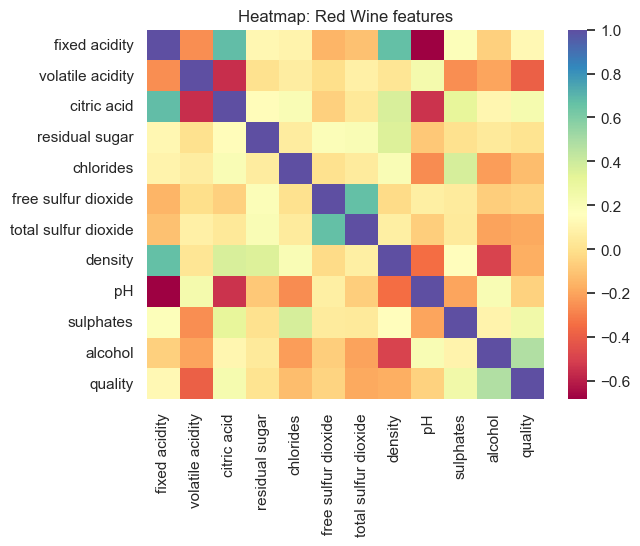

In [401]:
#Heatmap to guide feature selection
corr = dfred.corr()

redwine_heatmap = sns.heatmap(corr, annot=False, cmap='Spectral',)
plt.title('Heatmap: Red Wine features')

plt.show()



In [402]:
#Can drop columns in future 
#"citric acid","pH","sulphates"
dfred = dfred.drop(columns=["fixed acidity","sulphates","citric acid"],axis = 1, inplace = False )


In [403]:
#Check skew 
print(dfred['quality'].astype(float).skew())

print(dfred['quality'].astype(float).kurt())

0.21780157547366327
0.2967081197538759


In [404]:
#categorize quality
dfred["quality_label"] = dfred['quality'].apply(lambda value: "poor"
                                                                if value <= 3 else "low"
                                                                if value <= 5 else "medium"
                                                                if value <= 6 else "high"
                                                                if value <= 8 else "exceptional") 



#dfred["quality_label"] = pd.Categorical(dfred["quality_label"], categories = ["poor","low","medium","high","exceptional"])
dfred["quality_label"] = pd.Categorical(dfred["quality_label"], categories = ["poor","low","medium","high","exceptional"])

dfred = dfred.query("quality_label == 'low' or quality_label =='medium' or quality_label =='high'")
###2ND CATEGORIZATION; REMOVING EXTRA CATEGORIES FOR LOW AND EXCEPTIONAL 
#dfred["quality_label"] = dfred['quality'].apply(lambda value: "low"
#                                                                if value <= 5 else "medium"
#                                                                if value <= 6 else "high") 

#dfred["quality_label"] = pd.Categorical(dfred["quality_label"], categories = ["low","medium","high"])
#dfred.head(5)

# Initialize LabelEncoder


#LABEL ENCODER WASNT GOOD FOR THIS; NEED A CATEGORICAL ENCODER to do a better job, like one hot encoder
le = LabelEncoder()

# Fit the LabelEncoder to the data
le.fit(["low","medium","high"])
#le.fit(["poor","low","medium","high","exceptional"])
le.classes_

# Transform the data into numerical labels
dfred["quality_label"] = le.transform(dfred["quality_label"])

#dfred = pd.get_dummies(dfred,columns=["quality_label"],drop_first=True)


###SECOND ITER ENCODING COULDNT MANAGE

# Create a OneHotEncoder object
#enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the data and transform the 'color' column
#X = [['poor', 0], ['low', 1], ['medium', 2],['high', 3],['exceptional',4]]

#enc.fit(X)
# Transform the categorical column into binary vectors
#encoded_df = pd.DataFrame(enc.transform(dfred[["quality_label"]]).toarray(), columns=enc.get_feature_names())

#dfred["quality_label"] = enc.transform(dfred["quality_label"])

#encoded_df.head(5)


#data = pd.get_dummies(dfred,prefix=['quality_label'], columns = ['quality_label'], drop_first=True)
#data.head(5)
#transformed = enc.transform(data['quality_label'].to_numpy().reshape(-1, 1))
#Create a Pandas DataFrame of the hot encoded column
#ohe_df = pd.DataFrame(transformed, columns=enc.get_feature_names())
#concat with original data
#data = pd.concat([data, ohe_df], axis=1).drop(['Profession'], axis=1)
#data.head(5)

dfred.head(5)

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,quality,quality_label
0,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,9.4,5,1
1,0.88,2.6,0.098,25.0,67.0,0.9968,3.20,9.8,5,1
2,0.76,2.3,0.092,15.0,54.0,0.9970,3.26,9.8,5,1
3,0.28,1.9,0.075,17.0,60.0,0.9980,3.16,9.8,6,2
4,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,9.4,5,1


In [405]:
#Check data, all good so far
#dfred.head(5)

In [406]:
#Split data set

before_X = dfred.drop(['quality_label','quality',],axis=1,inplace=False) #dropping quality_label(target) and quality as they would let the model cheat
X = before_X # --> the features we will keep to build our model
y = dfred["quality_label"] # --> what you're trying to predict

X.info()
#y.info()
# Example:

#print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#X_test.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1589 non-null   float64
 1   residual sugar        1589 non-null   float64
 2   chlorides             1589 non-null   float64
 3   free sulfur dioxide   1589 non-null   float64
 4   total sulfur dioxide  1589 non-null   float64
 5   density               1589 non-null   float64
 6   pH                    1589 non-null   float64
 7   alcohol               1589 non-null   float64
dtypes: float64(8)
memory usage: 111.7 KB


In [407]:
#Inspect test and training data


print(X_train.astype(float).skew())
    # skew on residual sugar and chlorides 

#print(X_train.astype(float).kurt())
    # crazy kurt on sugar and chlorides, a little on sulphates too 


#Not sure if we need to inspect test data too but ok
#print(X_test.astype(float).skew())
    # skew on residual sugar and chlorides 

#print(X_test.astype(float).kurt())
    # also crazy kurt on sugar and chlorides, not as much on sulphates as with training dat, a little kurt on total sulfur dioxide


volatile acidity        0.580363
residual sugar          4.471410
chlorides               5.773906
free sulfur dioxide     1.217367
total sulfur dioxide    1.389314
density                 0.018372
pH                      0.210198
alcohol                 0.812600
dtype: float64


In [408]:
#Checking value counts for quality_labels
y_train.value_counts()
#y_test.value_counts()

quality_label
1    593
2    494
0    184
Name: count, dtype: int64

In [409]:
#Scale data

# fit scaler on training data
Scaler = MinMaxScaler().fit(X_train)

# transform training data
X_train_scaled=Scaler.transform(X_train)
X_test_scaled=Scaler.transform(X_test)


In [410]:
#MACHINE LEARNING MODELS

training = True
while training == True:
    ###RANDOM FOREST
    RF_clf = RandomForestClassifier(n_estimators = 300, random_state=42)

    #fit model
    RF_clf.fit(X_train_scaled,y_train)
    #predictions
    preds_RFClass = RF_clf.predict(X_test_scaled)



    ###LOG REG
    LR_model = LogisticRegression(random_state = 42, max_iter = 100) # you cant really overshoot, it just takes longer, the more rows you have, if you have a large max_iter
    #fit model
    LR_model.fit(X_train_scaled,y_train)
    #predicitions
    preds_LogReg = LR_model.predict(X_test_scaled) 



    ###DECISION TREE CLASSIFIER 
    RF_decisiontree = DecisionTreeClassifier(random_state=0)
    #fit model
    RF_decisiontree.fit(X_train_scaled,y_train)
    #predicitons 
    preds_DecisionTree = RF_decisiontree.predict(X_test_scaled)

     ###MODEL EVALUATION RANDOM FOREST
    acc = accuracy_score(y_test,preds_RFClass)
    print("Accuracy of Random forest classifer: ",acc)
    
    ###MODEL EVAL LOG REG
    acc = accuracy_score(y_test, preds_LogReg)
    print("Accuracy of Logistic Regression: ",acc)

    ###MODEL EVAL DECISION TREE 
    acc = accuracy_score(y_test, preds_DecisionTree)
    print("Accuracy of Decision Tree: ",acc)

    #break while loop
    training = False




Accuracy of Random forest classifer:  0.7169811320754716
Accuracy of Logistic Regression:  0.6194968553459119
Accuracy of Decision Tree:  0.6761006289308176


In [411]:
###RESULTS:

#FIRST ITER
###Percentage accuracy low, could be due to label encoding. Trying hot label encoder
##FIRST ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.684375
        #Accuracy of Logistic Regression:  0.58125
        #Accuracy of Decision Tree:  0.584375

#SECOND ITER #DECLINE
###Removed Citric acid only
#SECOND ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.671875
        #Accuracy of Logistic Regression:  0.58125
        #Accuracy of Decision Tree:  0.609375

#THIRD ITER
###REMOVED Citric acid and SULPHATES
#THIRD ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.696875
        #Accuracy of Logistic Regression:  0.58125
        #Accuracy of Decision Tree:  0.590625

#FOURTH ITER IMPROVEMENT 
###REMOVED Citric acid and SULPHATES and FIXED ACIDITY
#FOURTH ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.7125
        #Accuracy of Logistic Regression:  0.565625
        #Accuracy of Decision Tree:  0.609375

#FIFTH ITER 
###REMOVED SULPHATES and FIXED ACIDITY, keeping citric acid 
#FITFH ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.7125
        #Accuracy of Logistic Regression:  0.571875
        #Accuracy of Decision Tree:  0.628125

#SIXTH ITER
###REMOVE OUTLIER (poor and exceptional), as poor (wines under rating 3) and exceptional (wines 7 and above), have very few datapoints)




In [412]:
 #Classification reports
print("RANDOM FOREST CLASSIFICATION REPORT: ",classification_report(y_test, preds_RFClass))
print("LOG REG CLASSIFICATION REPORT: ",classification_report(y_test, preds_LogReg))
print("Decision Tree Classifier CLASSIFICATION REPORT: ",classification_report(y_test, preds_DecisionTree))


RANDOM FOREST CLASSIFICATION REPORT:                precision    recall  f1-score   support

           0       0.69      0.73      0.71        33
           1       0.73      0.78      0.75       141
           2       0.71      0.65      0.68       144

    accuracy                           0.72       318
   macro avg       0.71      0.72      0.71       318
weighted avg       0.72      0.72      0.72       318

LOG REG CLASSIFICATION REPORT:                precision    recall  f1-score   support

           0       0.44      0.21      0.29        33
           1       0.63      0.86      0.72       141
           2       0.63      0.48      0.55       144

    accuracy                           0.62       318
   macro avg       0.57      0.52      0.52       318
weighted avg       0.61      0.62      0.60       318

Decision Tree Classifier CLASSIFICATION REPORT:                precision    recall  f1-score   support

           0       0.57      0.76      0.65        33
          

In [413]:
#Best model by far so far Random forest classifer
confusion_matrix(y_test,preds_RFClass)

#FOURTH ITER CONFUSION MATRIX (removed features)
#array([[  0,   4,   0,   1,   0],
#       [  1,  25,   1,  15,   0],
#       [  0,   1, 111,  28,   0],
#       [  0,  10,  30,  92,   0],
#       [  0,   0,   1,   0,   0]], dtype=int64)


#We see its bad at predicting exceptional and poor wine, due to the data density (way more low, medium and high quality wines)

#FIFTH ITER CONFUSION MATRIX
    #CHANGED: labels, now only low mediums and highs, changed boundaries for these a bit too

#array([[ 26,   0,  21],
#       [  0,   0,  11],
#       [ 13,   0, 249]], dtype=int64)
#Better predictions, but significant amount of errors, cant predict high quality wines 


#SIXTH ITER CONFUSION MATRIX
    #CHANGED: changed boundaries for low, mediums and highs
#array([[ 29,   1,  17],
#       [  2, 114,  25],
#       [ 11,  26,  95]], dtype=int64)


#SEVENTH ITER CONFUSTION MATRX
    #Removed outlier super lows and super highs
#Improved average accuracy to ~70% for each type of prediction
#however, less good at predicting high quality wines correctly 

array([[ 24,   2,   7],
       [  0, 110,  31],
       [ 11,  39,  94]], dtype=int64)

In [414]:
 #Classification reports

#Decode labels
dfred["quality_label"]  = le.inverse_transform(dfred["quality_label"])
y_test  = le.inverse_transform(y_test)
preds_RFClass = le.inverse_transform(preds_RFClass)

preds_LogReg = le.inverse_transform(preds_LogReg)

preds_DecisionTree = le.inverse_transform(preds_DecisionTree)


print("RANDOM FOREST CLASSIFICATION REPORT: ",classification_report(y_test, preds_RFClass))
print("LOG REG CLASSIFICATION REPORT: ",classification_report(y_test, preds_LogReg))
print("Decision Tree Classifier CLASSIFICATION REPORT: ",classification_report(y_test, preds_DecisionTree))

RANDOM FOREST CLASSIFICATION REPORT:                precision    recall  f1-score   support

        high       0.69      0.73      0.71        33
         low       0.73      0.78      0.75       141
      medium       0.71      0.65      0.68       144

    accuracy                           0.72       318
   macro avg       0.71      0.72      0.71       318
weighted avg       0.72      0.72      0.72       318

LOG REG CLASSIFICATION REPORT:                precision    recall  f1-score   support

        high       0.44      0.21      0.29        33
         low       0.63      0.86      0.72       141
      medium       0.63      0.48      0.55       144

    accuracy                           0.62       318
   macro avg       0.57      0.52      0.52       318
weighted avg       0.61      0.62      0.60       318

Decision Tree Classifier CLASSIFICATION REPORT:                precision    recall  f1-score   support

        high       0.57      0.76      0.65        33
         l

[[ 24   2   7]
 [  0 110  31]
 [ 11  39  94]]


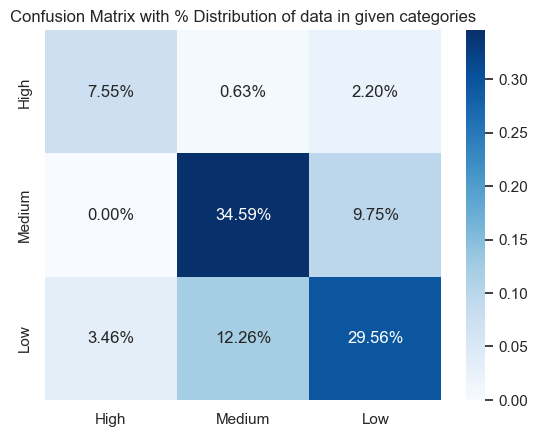

In [415]:
#Best model by far so far Random forest classifer
cf_matrix = confusion_matrix(y_test,preds_RFClass)
#Get the confusion matrix

print(cf_matrix)
#ACCURACY REPORT ON BEST COMBINATION
#RANDOM FOREST CLASSIFICATION REPORT:                
# precision    recall  f1-score   support
#high         0.70      0.70      0.70        33
#low          0.72      0.82      0.77       141
#medium       0.74      0.65      0.69       144
#accuracy                         0.73       318
#macro avg    0.72      0.72      0.72       318
#weighted avg 0.73      0.73      0.73       318

#SIXTH ITER CONFUSION MATRIX
    #CHANGED: changed boundaries for low, mediums and highs
#[[ 23   2   8]
# [  1 116  24]
# [  9  42  93]]


#CONCLUSIONS
    #Removed outlier super lows and super highs
#Improved average accuracy to ~70% for each type of prediction
#however, less good at predicting high quality wines correctly

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=['High',"Medium","Low"],
            yticklabels=["High","Medium","Low"])


# Add title
plt.title('Confusion Matrix with % Distribution of data in given categories')

plt.show()

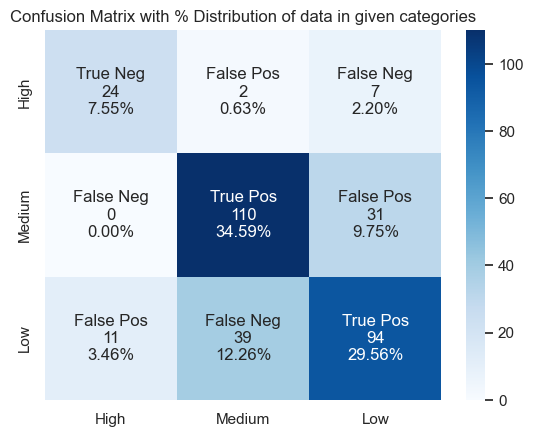

In [417]:
#Plotting confusion matrix 
import seaborn as sns

sns.set()

#labels = ["True Neg","False Pos","False Neg","False Neg","True Pos","False Pos","False Pos","False Neg","True Pos"]
#labels = np.asarray(labels).reshape(3,3)
#sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")


group_names = ["True Neg","False Pos","False Neg","False Neg","True Pos","False Pos","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',xticklabels=['High',"Medium","Low"],
            yticklabels=["High","Medium","Low"])

plt.title('Confusion Matrix with % Distribution of data in given categories')

plt.show()